# <center> MUSIC GENRE CLASSIFICATION <center>

Sound/Audio signals can be represented in the form of various parameters such 
as frequency, bandwidth, roll-off and so on. Using various python libraries, we can 
perform feature extraction for these audio signals. These features can then be 
processed and further used to perform classification.
In this project, we will use GTZAN dataset 
https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genreclassification which consists of 10 genre with 100 songs each, all having a length 
of 30 seconds.

### Task:
Take two songs from each of the genre and visualize them and also find their
spectrogram.
 - a) Create a dataset by extracting feature for each of the songs in GTZAN dataset. 
For our task, we will specifically use the following features: Mel-Frequency 
Cepstral Coefficients, Spectral Centroid, Zero Crossing Rate, Chroma 
Frequencies and Spectral Roll-off.
 - b) Given total 1000 examples, perform K-Means-Clustering on the dataset to 
cross verify that the optimal number of clusters are 10 (one for each genre).
 - c) Divide the dataset into two parts: 90% train and 10% test i.e. for each genre 
use 90% of the dataset as train and the remaining as test dataset.
 - d) Perform classification using any of the four classification algorithms and 
compare the accuracy obtained. Study the architecture of the model used and 
describe the reason for the model with best accuracy

### About the Dataset
- genres original - A collection of 10 genres with 100 audio files each, all having a length of 30 seconds (the famous GTZAN dataset, the MNIST of sounds)
- images original - A visual representation for each audio file. One way to classify data is through neural networks. Because NNs (like CNN, what we will be using today) usually take in some sort of image representation, the audio files were converted to Mel Spectrograms to make this possible.
- 2 CSV files  
  - Containing features of the audio files. One file has for each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file.
  
  - The other file has the same structure, but the songs were split before into 3 seconds audio files (this way increasing 10 times the amount of data we fuel into our classification models). With data, more is always better.

### Procedure:
- Import Libraries
- Explore and Visualize the Audio Data.
- Take two songs from each of the genre and visualize them and also find their spectrogram
- Feature Extraction
- Create a dataset by extracting feature for each of the songs in GTZAN dataset. 
- Perform K-Means-Clustering on the dataset.
- Splitting the dataset into train and test
- Try 4 Classification algorithm 
- Check the accuracy and predict the best model.


### Import Libraries

In [101]:
pip install --upgrade librosa

Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Librosa (thr mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')


### Printing the Genres

In [103]:
import os
general_path='../input/gtzan-dataset-music-genre-classification/Data'
genres=(list(os.listdir(f'{general_path}/genres_original/')))
genres


['disco',
 'metal',
 'reggae',
 'blues',
 'rock',
 'classical',
 'jazz',
 'hiphop',
 'country',
 'pop']

### Explore Audio Data
We will use librosa, which is the mother of audio files.
### Understanding Audio:
Let's first Explore our Audio Data to see how it looks (we'll work with reggae.00036.wav file).

- Sound: sequence of vibrations in varying pressure strengths (y)
- The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz

In [104]:
# Importing 1 file
y,sr=librosa.load(f'{general_path}/genres_original/hiphop/hiphop.00000.wav')

print('y:',y,'\n')
print('y shape', np.shape(y),'\n')
print('Sample rate(KHz):',sr,'\n')

y: [-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713] 

y shape (661504,) 

Sample rate(KHz): 22050 



### Trim the leading and trailing silence  from an audio signal(silence before and after the actual audio)

In [105]:
trim_y, _ = librosa.effects.trim(y)

# The result is an numpy ndarray
print('Audio File :',trim_y,'\n')
print('Audio File Shape :', np.shape(trim_y))

Audio File : [-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713] 

Audio File Shape : (661504,)


### Visualizing the Audio

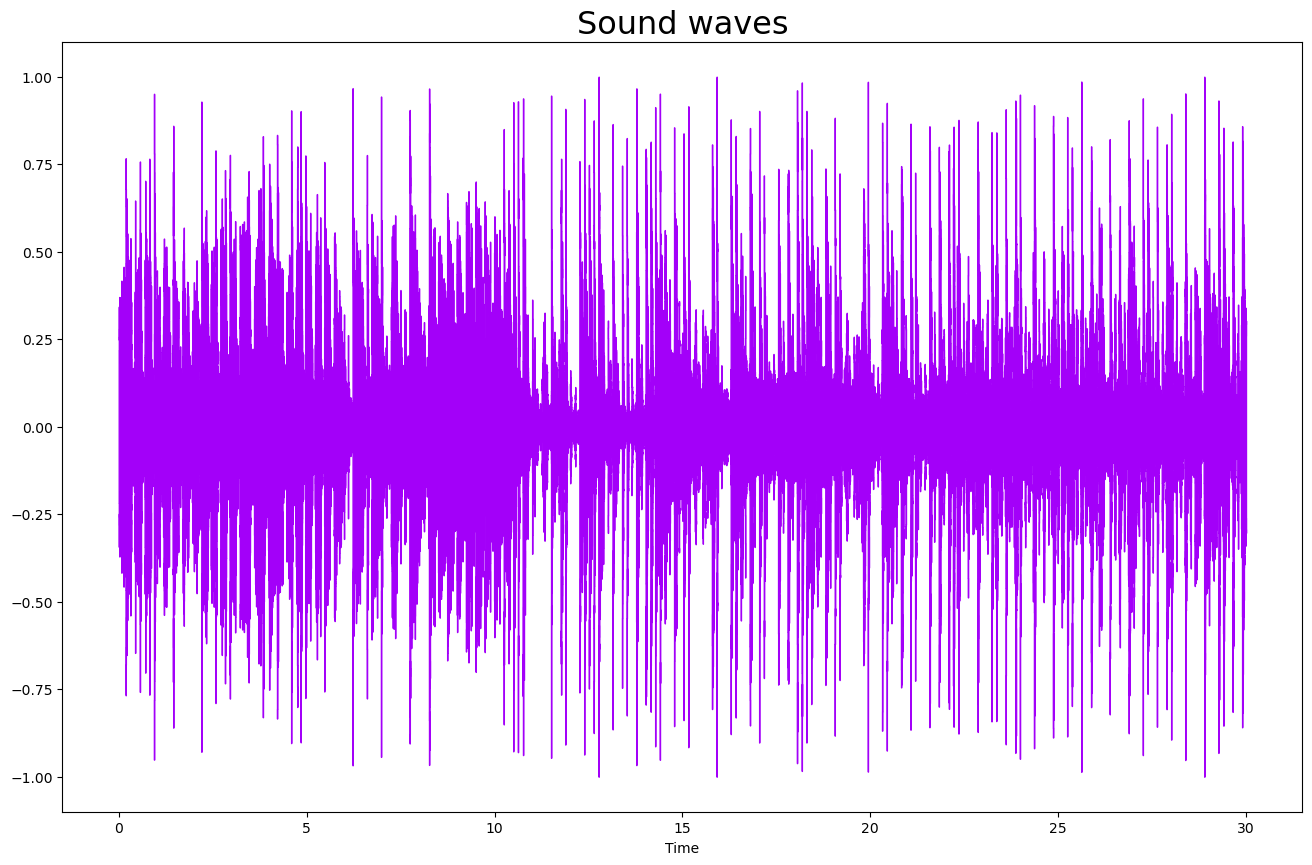

In [106]:
plt.figure(figsize=(16,10))
librosa.display.waveshow(y=trim_y,sr=sr,color="#A300F9")
plt.title("Sound waves", fontsize=23)
plt.show()

### Take two songs from each of the genre and visualize them and also find their spectrogram.

- A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams 
- Mel Spectrogram
The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

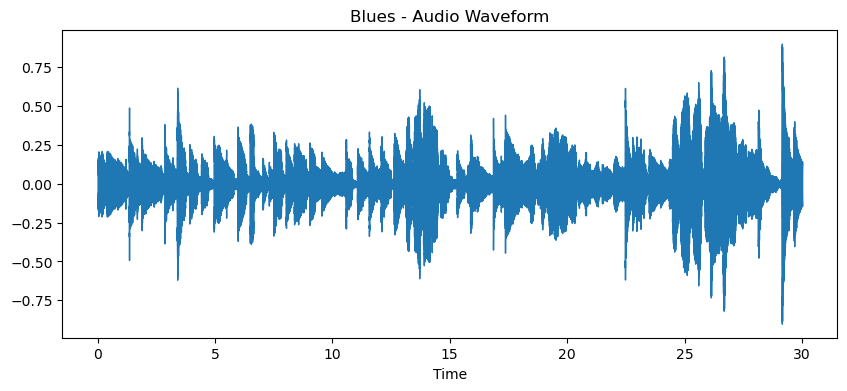

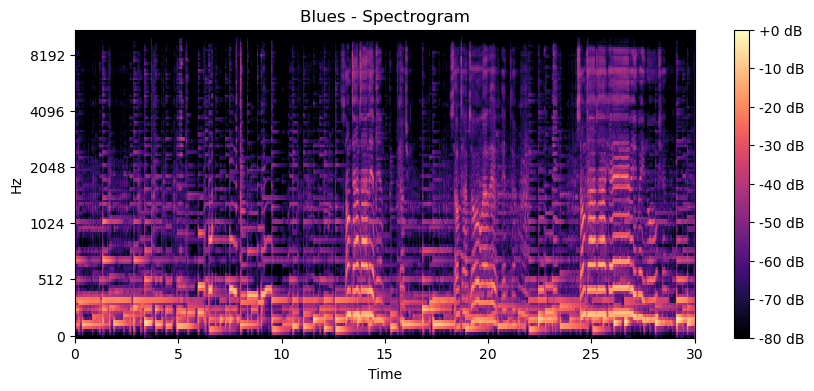

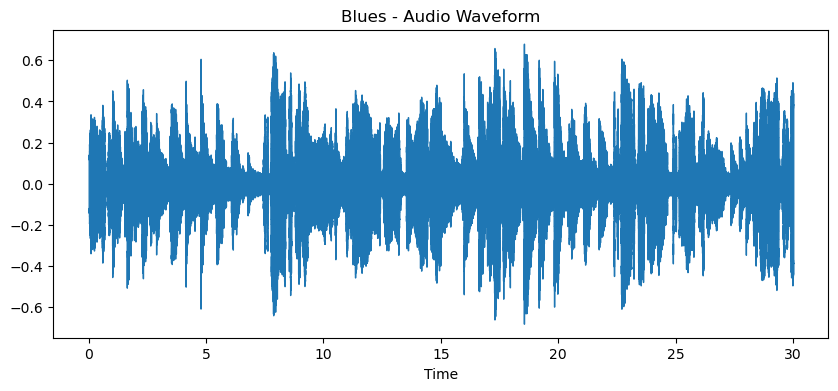

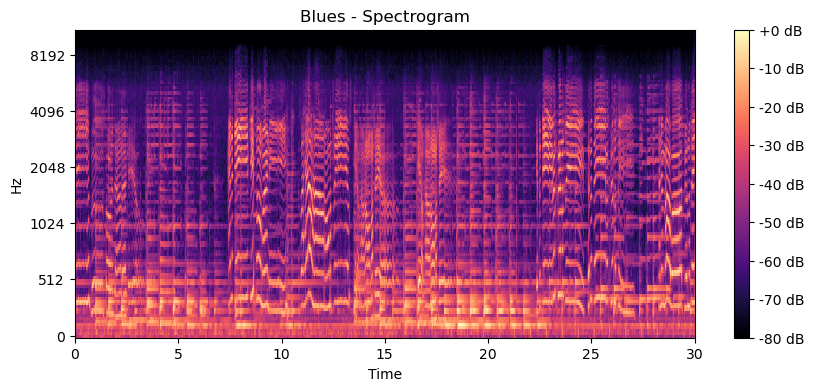

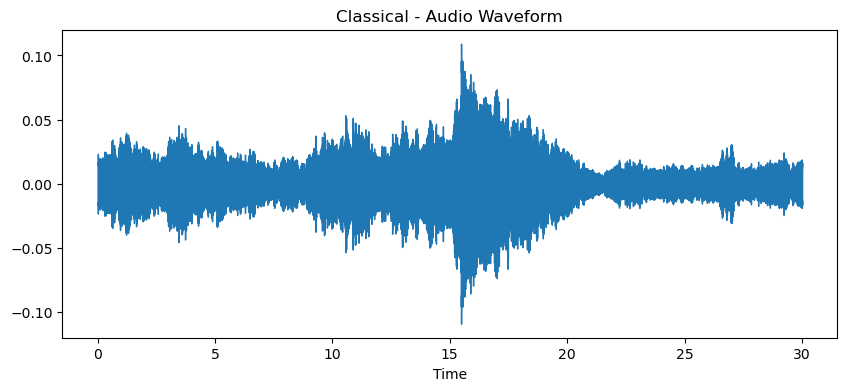

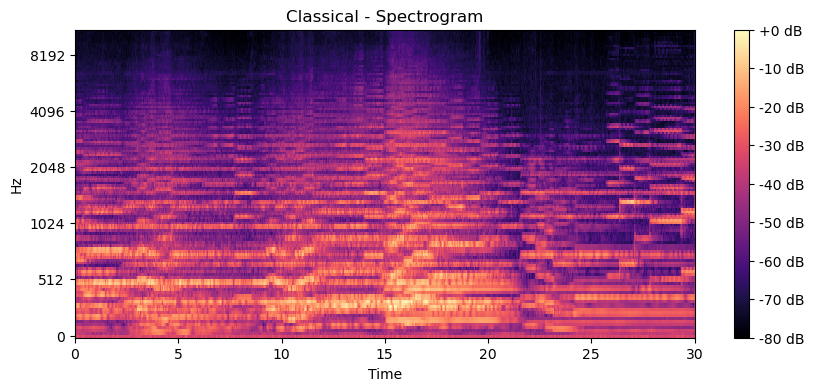

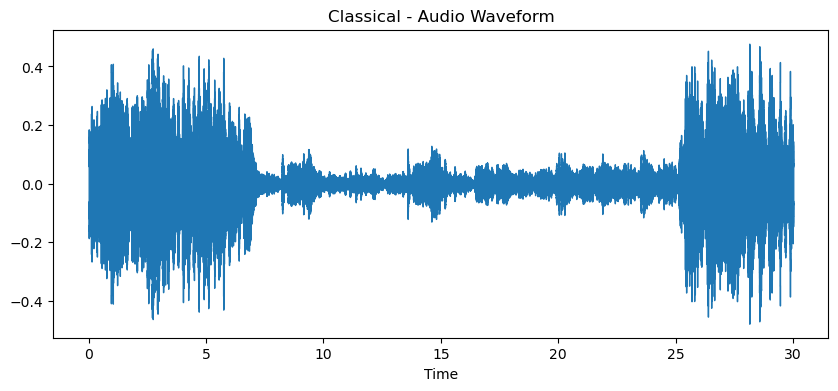

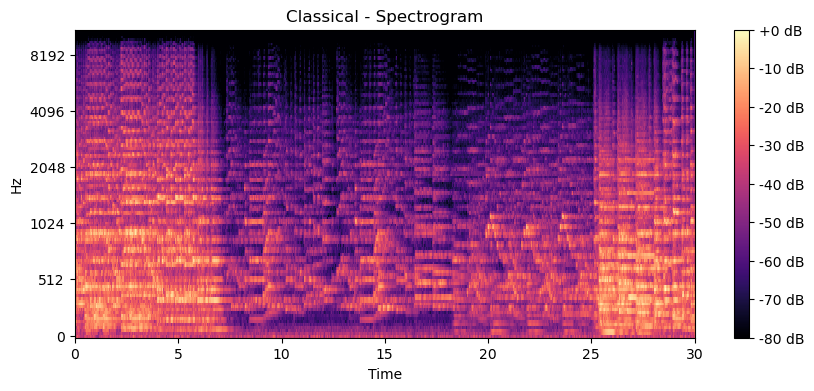

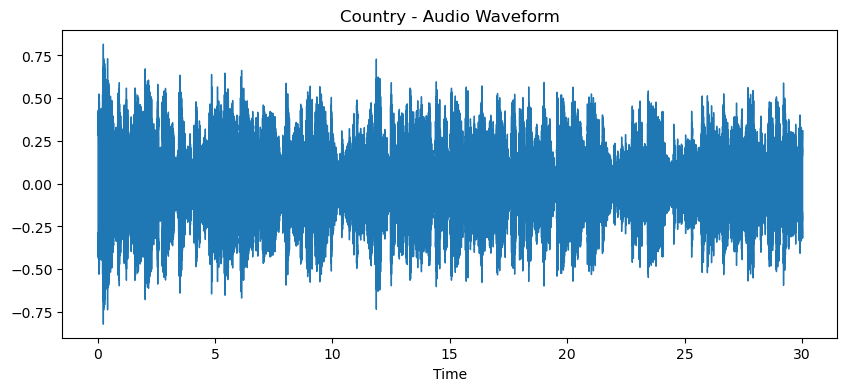

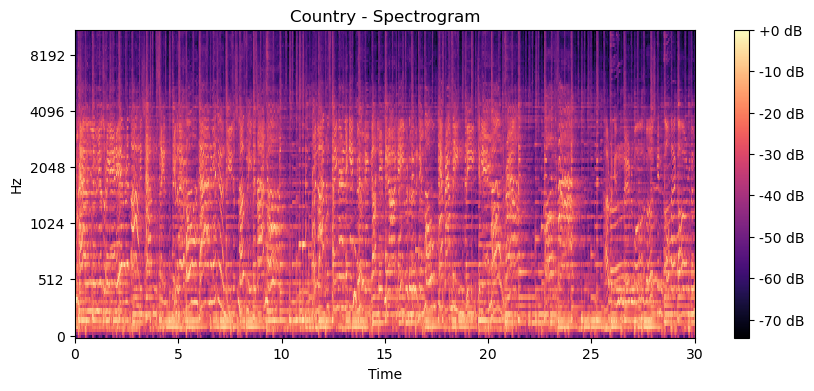

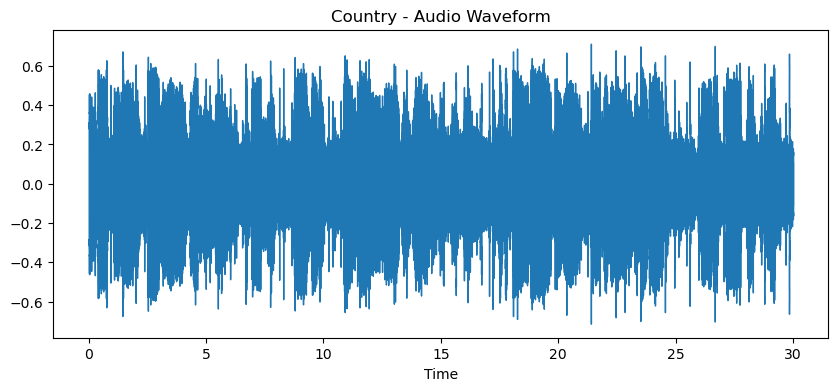

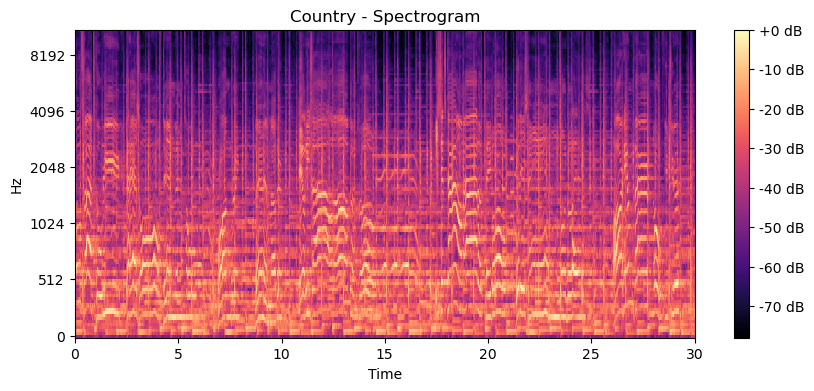

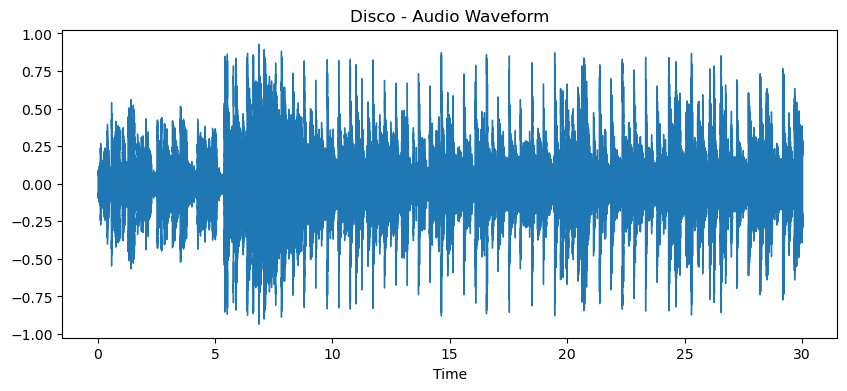

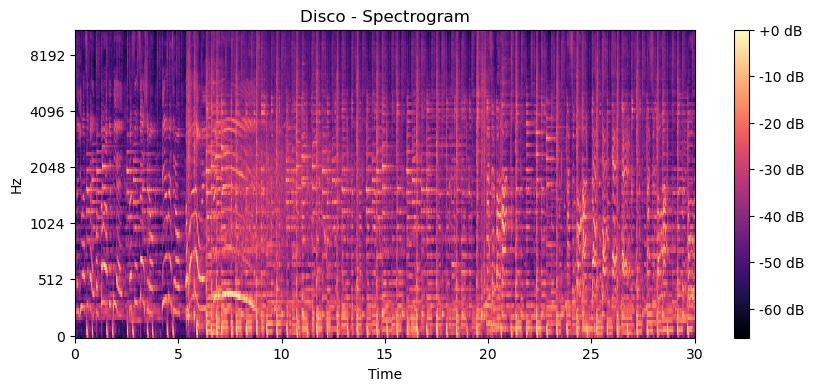

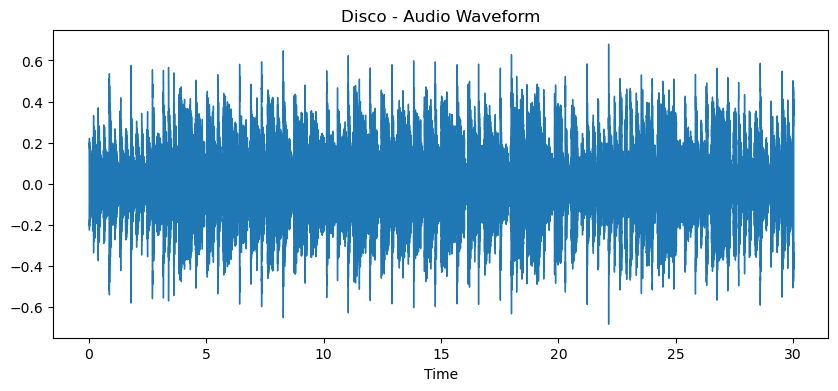

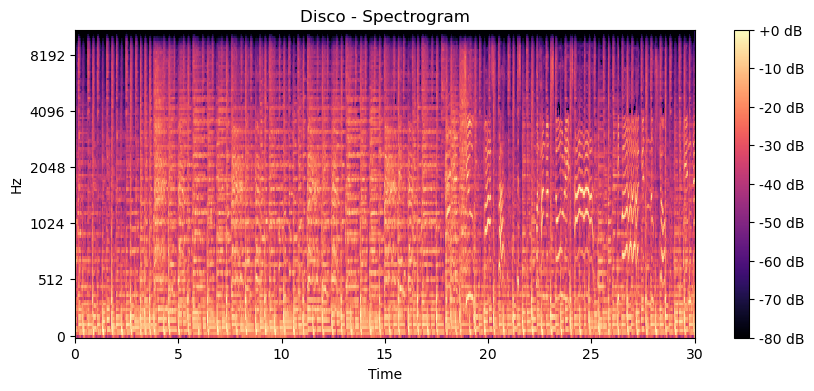

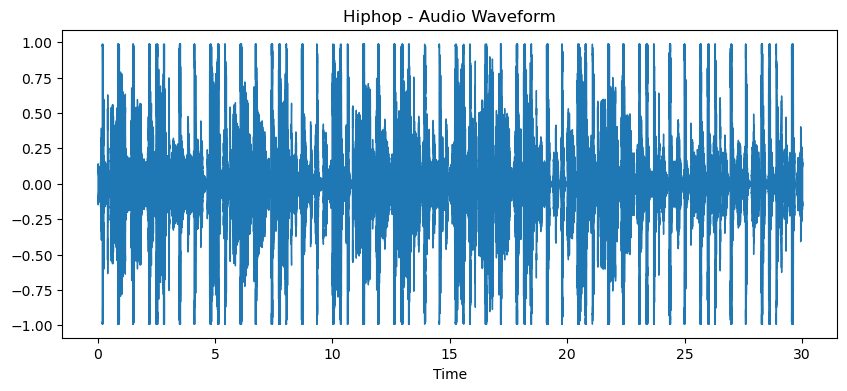

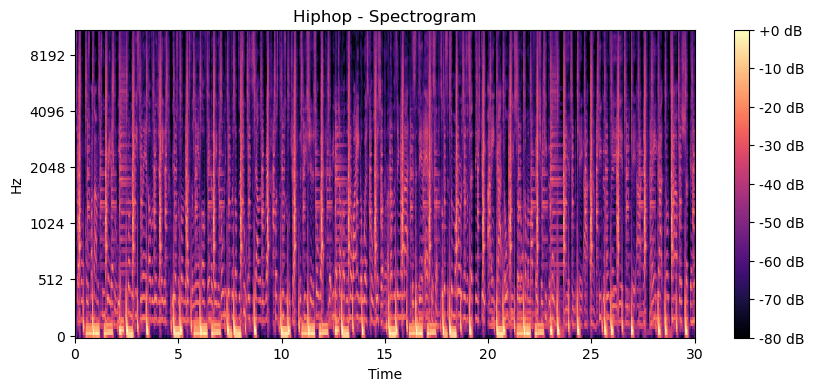

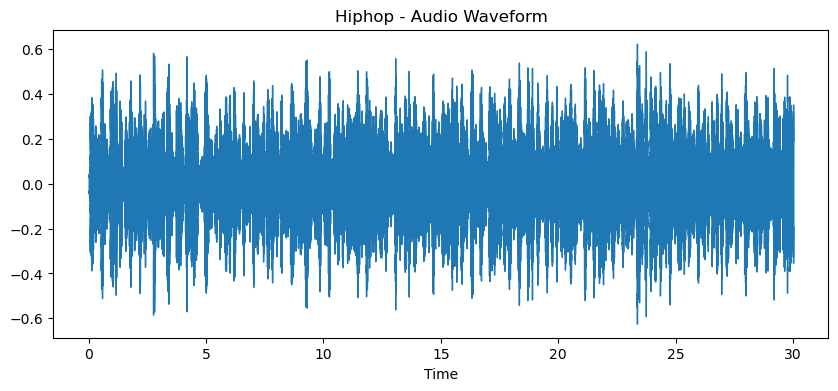

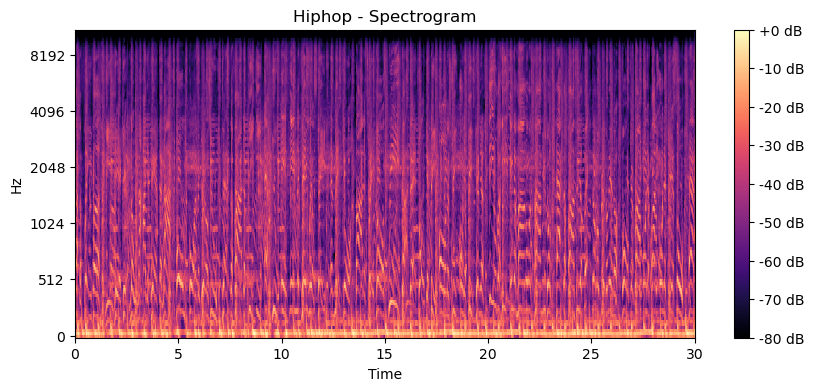

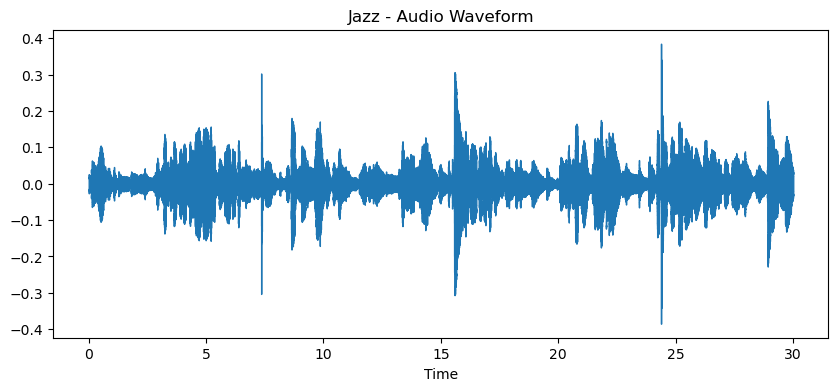

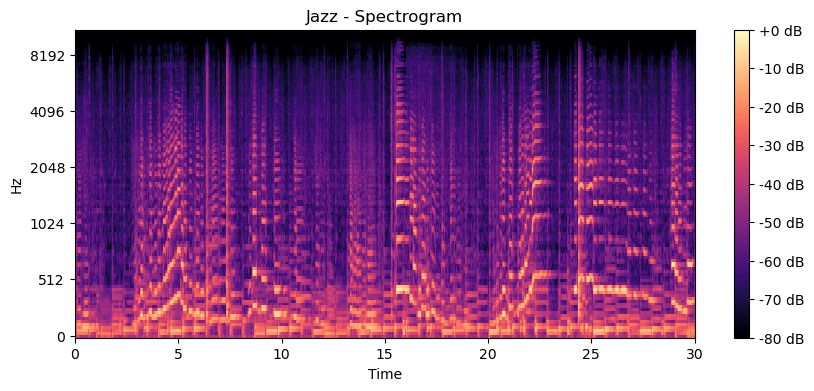

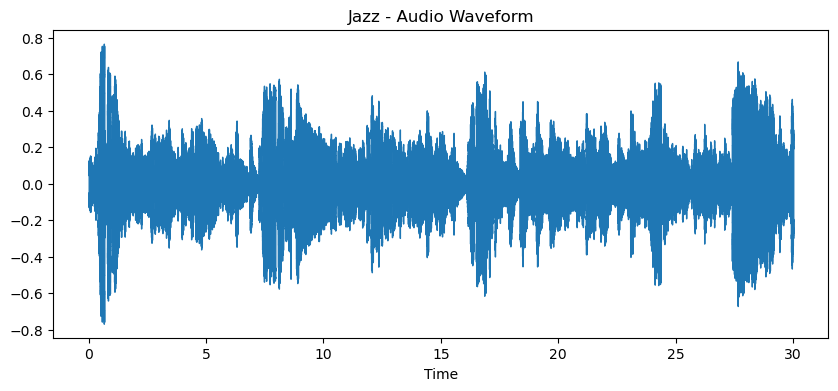

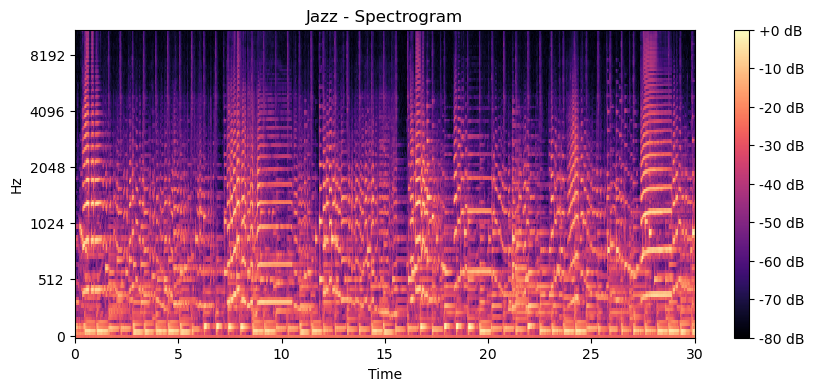

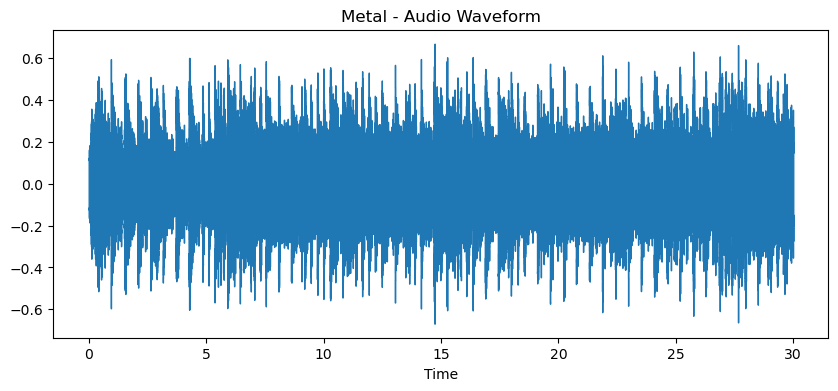

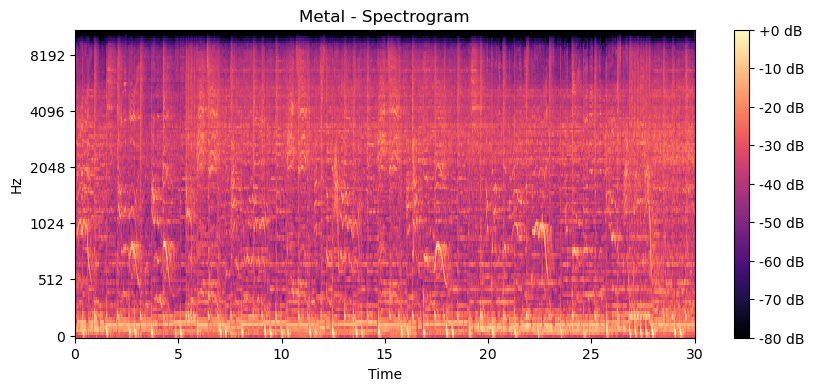

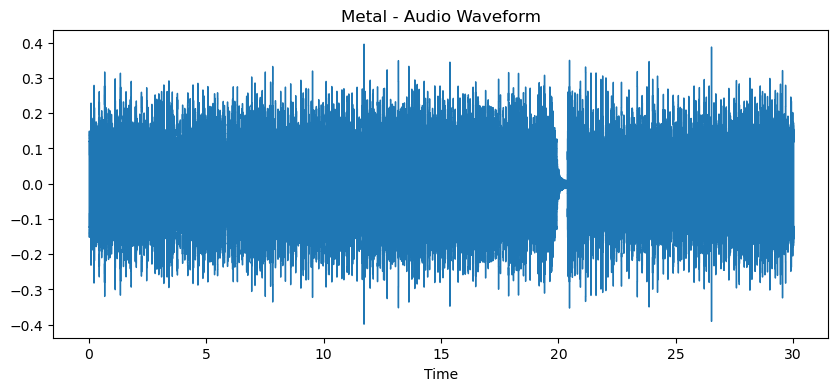

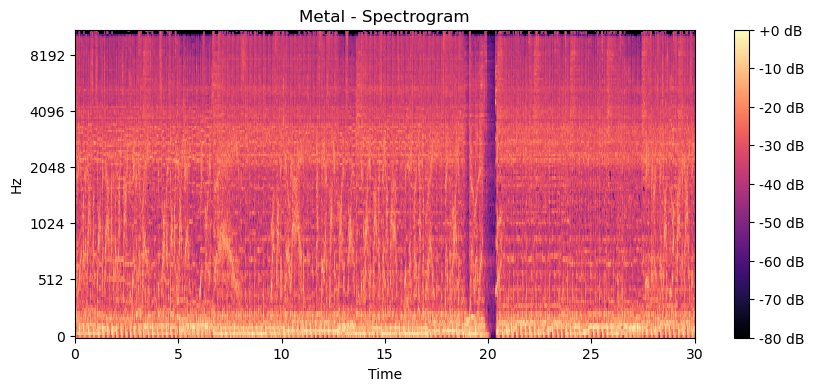

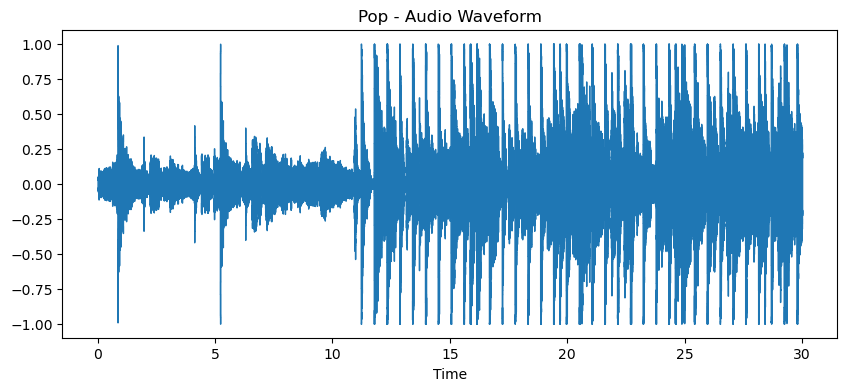

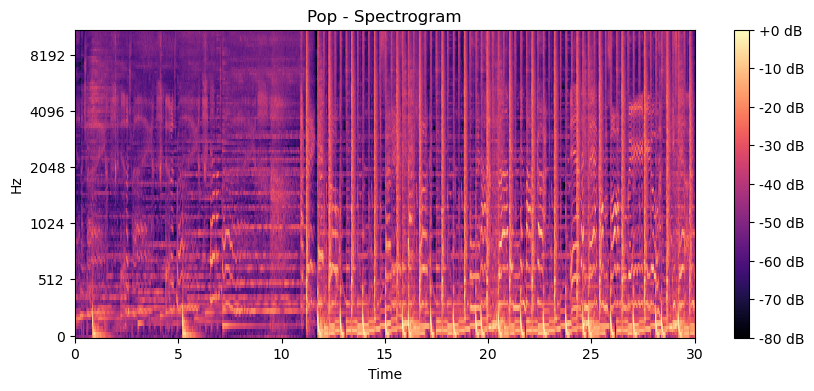

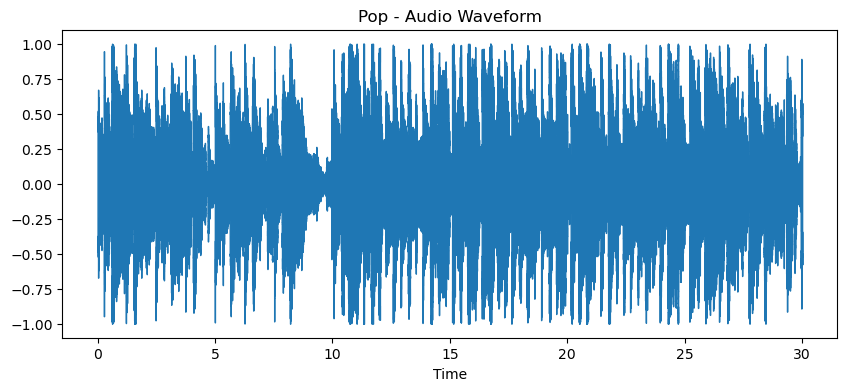

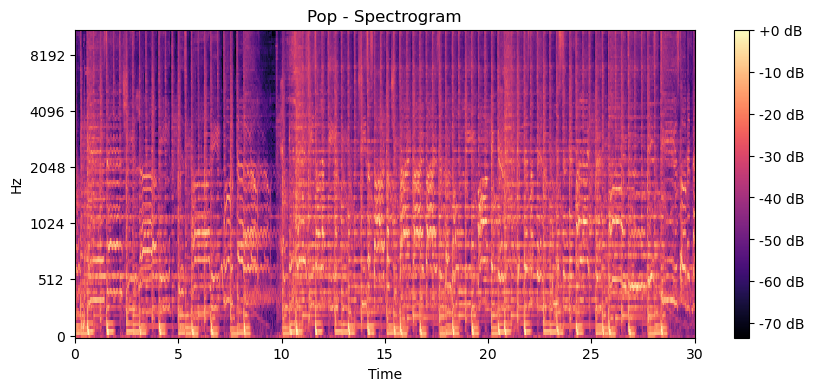

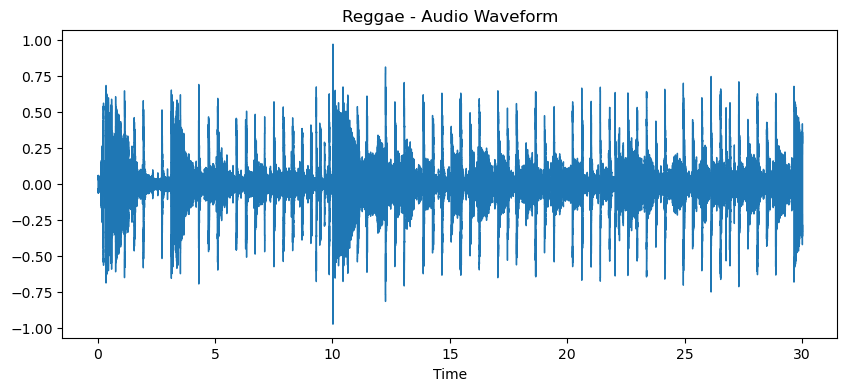

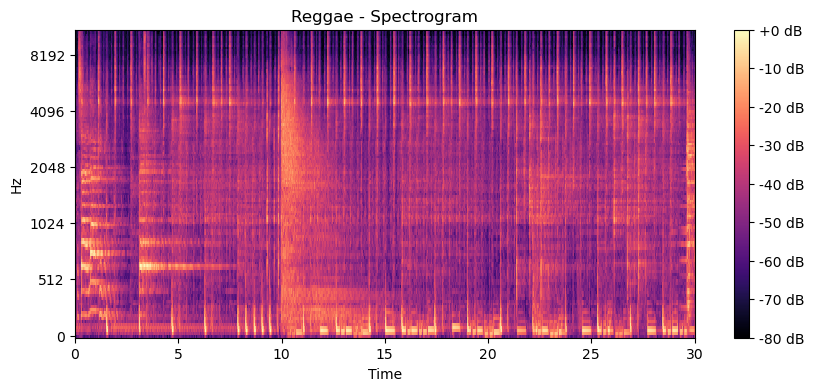

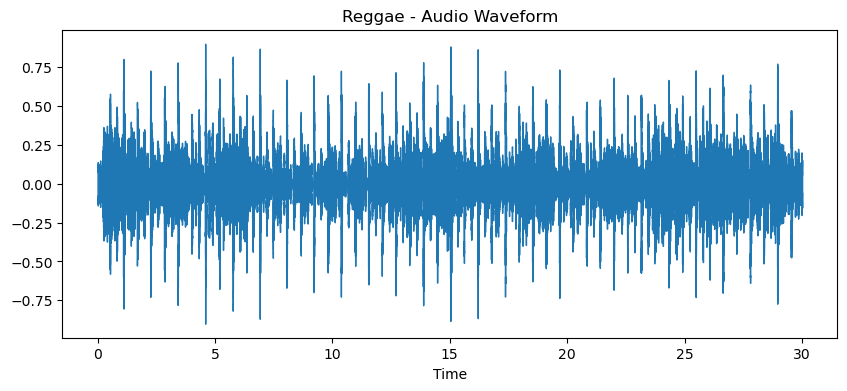

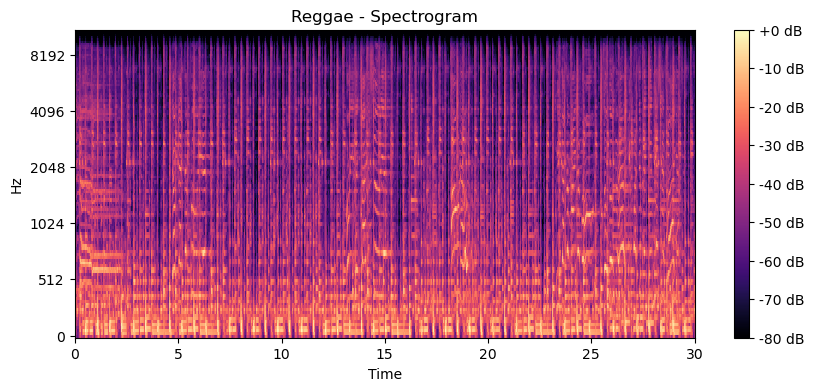

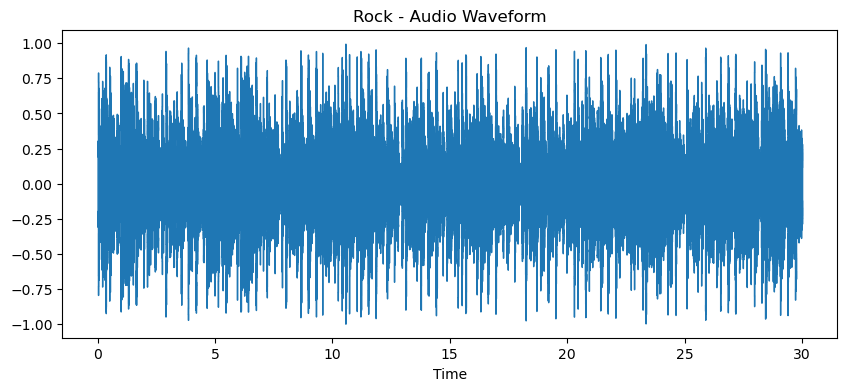

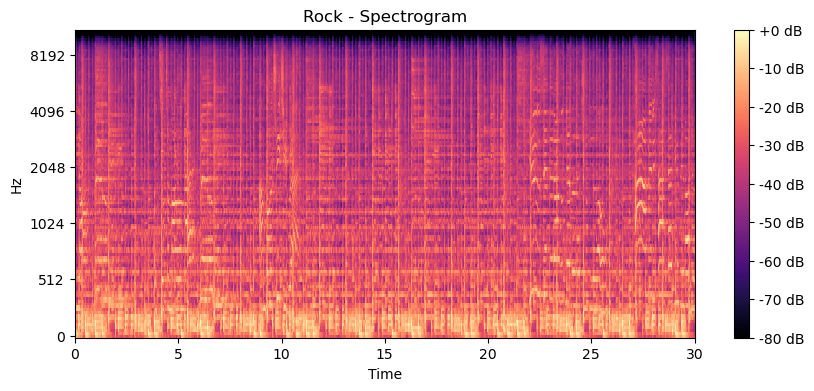

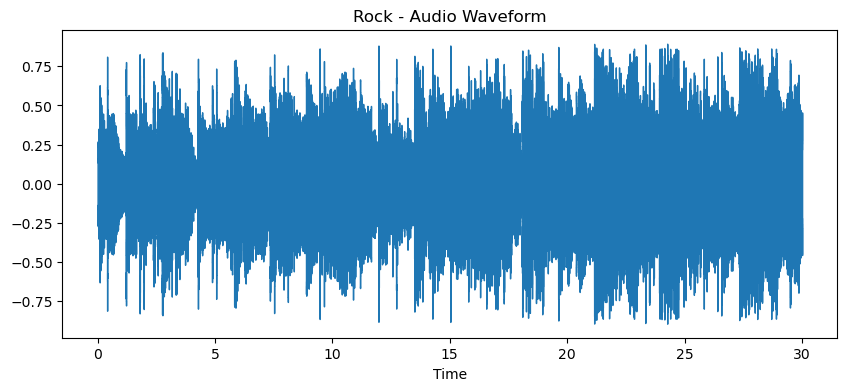

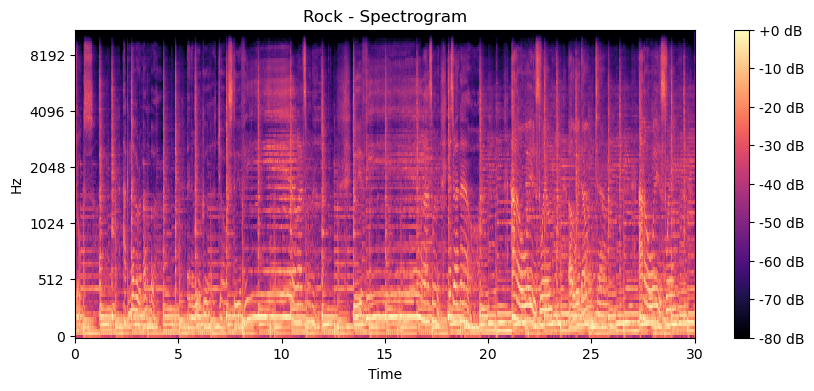

In [107]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Path to the GTZAN dataset folder containing subfolders for each genre
dataset_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data"

# List of genres in the dataset
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

# For each genre, load two audio files, visualize waveforms, and generate spectrograms
for genre in genres:
    genre_folder = os.path.join(dataset_path, "genres_original", genre)
    audio_files = os.listdir(genre_folder)[:2]  # Taking two songs from each genre
    
    for audio_file in audio_files:
        audio_file_path = os.path.join(genre_folder, audio_file)
        y, sr = librosa.load(audio_file_path)

        # Visualize audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(y, sr=sr)
        plt.title(f"{genre.capitalize()} - Audio Waveform")
        plt.show()
        # Generate and visualize spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"{genre.capitalize()} - Spectrogram")
        plt.show()



###  Feature Extraction and Spectrogram Generation

To create the dataset, we need to extract the features :
- Mel-Frequency Cepstral Coefficients (MFCCs):
MFCCs are widely used audio features that represent the spectral characteristics of an audio signal. They capture the shape of the power spectrum of a sound wave by converting it into the Mel scale (which simulates how humans perceive pitch), and then applying a discrete cosine transform. MFCCs are used in various audio-related tasks, such as speech recognition and music genre classification.

- Spectral Centroid:
The spectral centroid represents the "center of mass" of the spectrum of an audio signal. It indicates where the energy of a sound is concentrated and can provide information about the perceived brightness of the sound. Sounds with higher spectral centroids are often perceived as brighter or more treble-heavy.

- Zero Crossing Rate:
The zero crossing rate is the rate at which the audio waveform crosses the zero amplitude line. It's a measure of how often the audio signal changes its sign. This feature can provide information about the noisiness or percussiveness of a sound. For example, a higher zero crossing rate might be associated with percussive sounds.

- Chroma Frequencies:
Chroma features represent the 12 different pitch classes in an octave, corresponding to the 12 notes in Western music. These features capture the distribution of energy in each of the pitch classes, effectively summarizing the harmonic content of an audio signal. Chroma features are useful for tasks like music genre classification and chord recognition.

- Spectral Roll-off:
Spectral roll-off is a measure of the frequency below which a certain percentage of the total spectral energy resides. It can provide information about the shape of the frequency distribution and the overall spectral content of the audio signal. Higher spectral roll-off values may indicate more complex or high-energy sounds.

These features are commonly used in audio analysis and classification tasks because they capture various aspects of the sound signal that are relevant for differentiating between different audio sources, genres, and characteristics.

In [108]:
pip install audioread

Note: you may need to restart the kernel to use updated packages.


In [109]:
import librosa
import numpy as np
import os
import warnings

# Use the gstreamer backend for audioread
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["AUDIOREAD_FFMPEG"] = "gstreamer"


### Create a dataset by extracting feature for each of the songs in GTZAN dataset. 
For our task, we will specifically use the following features: Mel-Frequency 
Cepstral Coefficients, Spectral Centroid, Zero Crossing Rate, Chroma 
Frequencies and Spectral Roll-off.

In [110]:
import librosa
import numpy as np
import pandas as pd
import os

# Path to the GTZAN dataset folder containing subfolders for each genre
dataset_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data"

# List of genres in the dataset
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

# Initialize lists to store extracted features and labels
features_list = []
labels_list = []

# For each genre, load audio files and extract features
for genre in genres:
    genre_folder = os.path.join(dataset_path, "genres_original", genre)
    audio_files = os.listdir(genre_folder)[:2]  # Taking two songs from each genre
    
    for audio_file in audio_files:
        audio_file_path = os.path.join(genre_folder, audio_file)
        y, sr = librosa.load(audio_file_path)
        
        # Extract audio features
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=y))
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        
        # Append features and corresponding genre label
        genre_label = genres.index(genre)
        features = np.hstack((mfccs, spectral_centroid, zcr, chroma, spectral_rolloff, genre_label))
        features_list.append(features)

# Convert the list of features to a numpy array
dataset = np.array(features_list)

# Create a DataFrame to store the feature data
feature_names = [f"mfcc_{i}" for i in range(13)] + ["spectral_centroid", "zero_crossing_rate"] + [f"chroma_{i}" for i in range(12)] + ["spectral_rolloff", "genre"]
df = pd.DataFrame(data=dataset, columns=feature_names)

# Save the feature data to a CSV file
df.to_csv("gtzan_features.csv", index=False)


### Perform K-Means-Clustering on the dataset

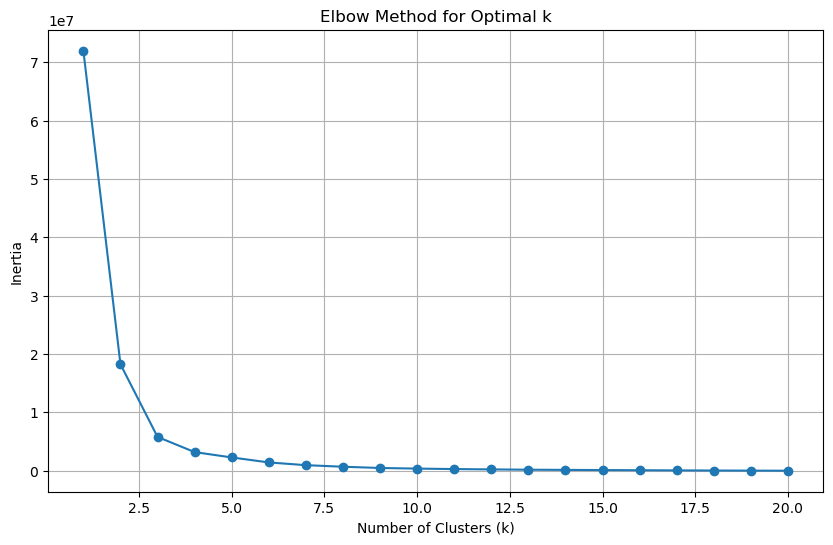

In [111]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("gtzan_features.csv")

# Extract features (excluding the genre label)
X = df.drop(columns=["genre"]).values

# Perform K-Means clustering with different numbers of clusters (k)
inertia_values = []
k_range = range(1, 21)  # Trying k values from 1 to 20
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Perform classification using any of the four classification algorithms and 
compare the accuracy obtained. Study the architecture of the model used and 
describe the reason for the model with best accuracy

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [113]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

### Features and Target variable
- creates the target and feature variables
- normalizes the data

In [114]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

### Splitting the data into training and testing
90% - 10% split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Creating a Predefined function to assess the accuracy of a model
- input is the model
- fits the model on the training dataset
- predicts on the testing features
- compares the predictions with the actuals

In [116]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Trying 4 different models to assess their performance.

In [117]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy KNN : 0.86086 

Accuracy Decission trees : 0.65766 

Accuracy Random Forest : 0.83283 

Accuracy Support Vector Machine : 0.76777 



### We tried 4 classification models, the best performing model was KNN
# <center>KNN is the winner - 86% accuracy<center>

KNN can be a good choice when your data exhibits localized patterns, and you have a reasonably sized dataset. However, its performance depends on various factors, including the choice of K and the nature of the data. It's essential to experiment with different algorithms and hyperparameters to determine the best model for your specific classification task.